This notebook is used to analyse the model runs for no discharge and with discharge scenarios and to plot the original streamflow data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Read the weiherbach and schwarzbach data
#With discharge
file_path = r'y_obs.csv'
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
y_sim.set_index(y_sim.columns[0],inplace=True)

In [85]:
# Example Usage
catchment = 'camelses_5138' # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\camelses\{catchment}.csv"
streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)

In [86]:
# Create a list to store the annual maximum dates and streamflows
annual_max_list = []
data = streamflow_df
# Resample by year
annual_groups = data['streamflow'].resample('Y')

for year, group in annual_groups:
    if not group.empty:
        max_date = group.idxmax()
        max_value = group.max()
        annual_max_list.append({'date': max_date, 'streamflow': max_value})

# Convert the list to a DataFrame
annual_max_dates = pd.DataFrame(annual_max_list)

print(annual_max_dates)

         date  streamflow
0         NaT         NaN
1         NaT         NaN
2  1992-06-28        0.17
3  1993-05-10        0.17
4  1994-01-06        0.19
5  1995-12-31       13.29
6  1996-01-07       11.98
7  1997-01-19       15.55
8  1998-02-05        3.22
9  1999-10-28        1.54
10 2000-04-17        2.14
11 2001-03-08        5.61
12 2002-04-12        2.61
13 2003-12-10        4.28
14 2004-04-02        3.13
15 2005-12-03        0.31
16 2006-10-24        1.54
17 2007-02-10        1.08
18 2008-04-20        4.55
19 2009-12-24        9.63
20 2010-02-22       13.72
21 2011-01-01        5.42
22 2012-11-09       12.24
23 2013-04-01       14.25
24 2014-02-14        1.86
25 2015-02-19        0.33
26 2016-11-22        0.48
27 2017-03-14        0.38
28 2018-03-16        2.04
29 2019-12-22        2.06
30 2020-04-11        0.27


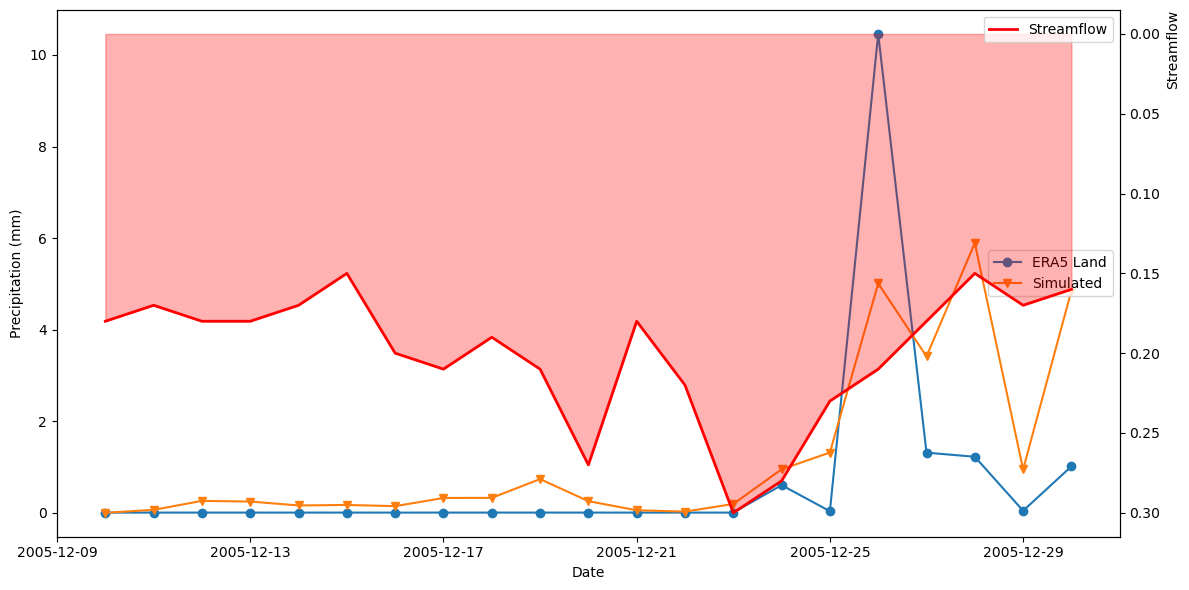

In [89]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', marker='v')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')
    #ax1.set_ylim([0, 50])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    #ax2.set_ylim([0, 25])
    #ax2.set_yticks([0,2,4,6,8,10])
    ax2.invert_yaxis()

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'camelses_5138'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\camelses\{catchment}.csv"
start_date = '2005-12-10'
end_date = '2005-12-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date)

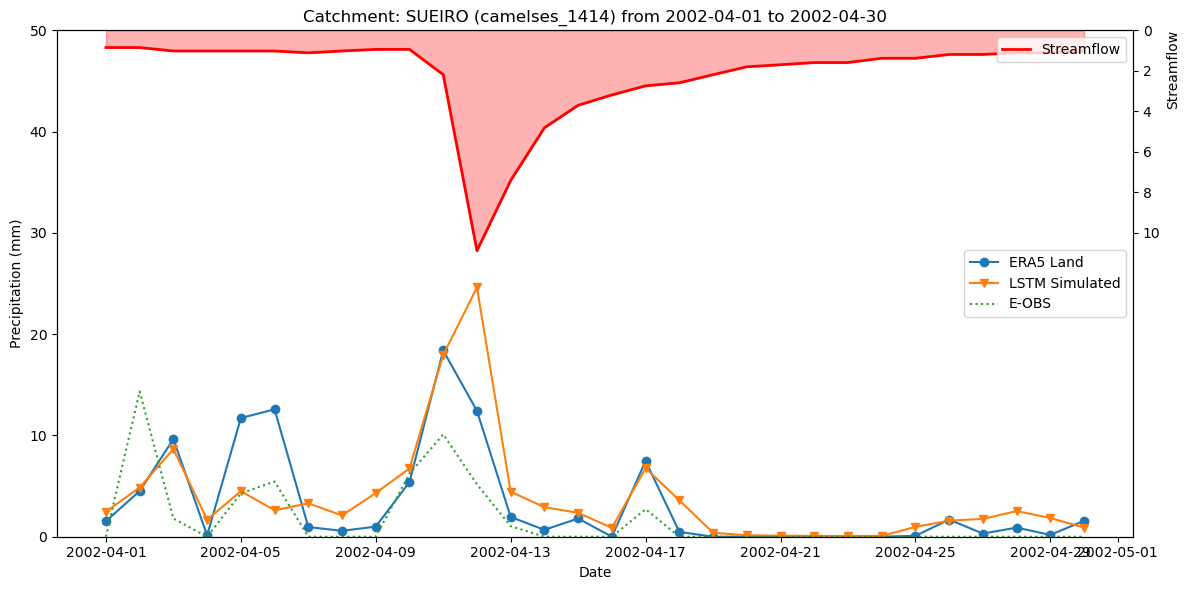

In [81]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    eobs_df = pd.read_csv(csv_path1, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    eobs_df_filtered = eobs_df.loc[start_date:end_date, 'value']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='LSTM Simulated', marker='v')
    ax1.plot(eobs_df_filtered.index, eobs_df_filtered, label='E-OBS', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')
    ax1.set_title(f'Catchment: SUEIRO (camelses_1414) from {start_date} to {end_date}')
    ax1.set_ylim([0, 50])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 25])
    ax2.set_yticks([0,2,4,6,8,10])
    ax2.invert_yaxis()

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'camelses_1414'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\camelses\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelses_1414.csv"
start_date = '2002-04-01'
end_date = '2002-04-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

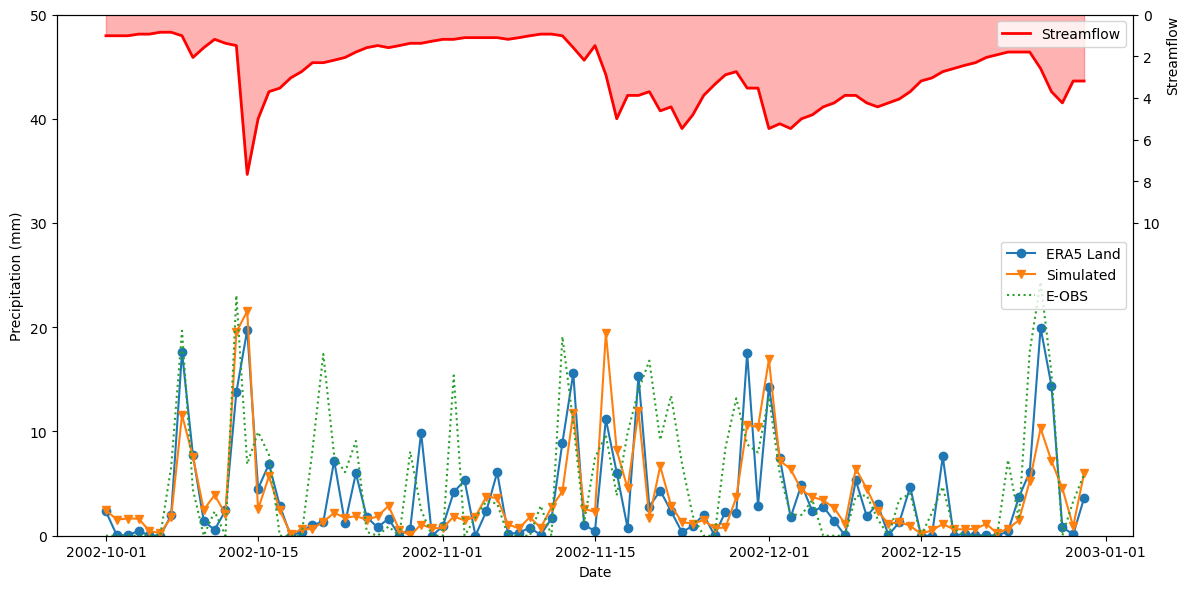

In [79]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, csv_path1,  catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    eobs_df = pd.read_csv(csv_path1, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    eobs_df_filtered = eobs_df.loc[start_date:end_date, 'value']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', marker='v')
    ax1.plot(eobs_df_filtered.index, eobs_df_filtered, label='E-OBS', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 50])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 25])
    ax2.set_yticks([0,2,4,6,8,10])
    ax2.invert_yaxis()

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'camelses_1414'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\camelses\{catchment}.csv"
csv_path1 = rf"precip_eobs_camelses_1414.csv"
start_date = '2002-10-01'
end_date = '2002-12-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path,csv_path1, catchment, start_date, end_date)

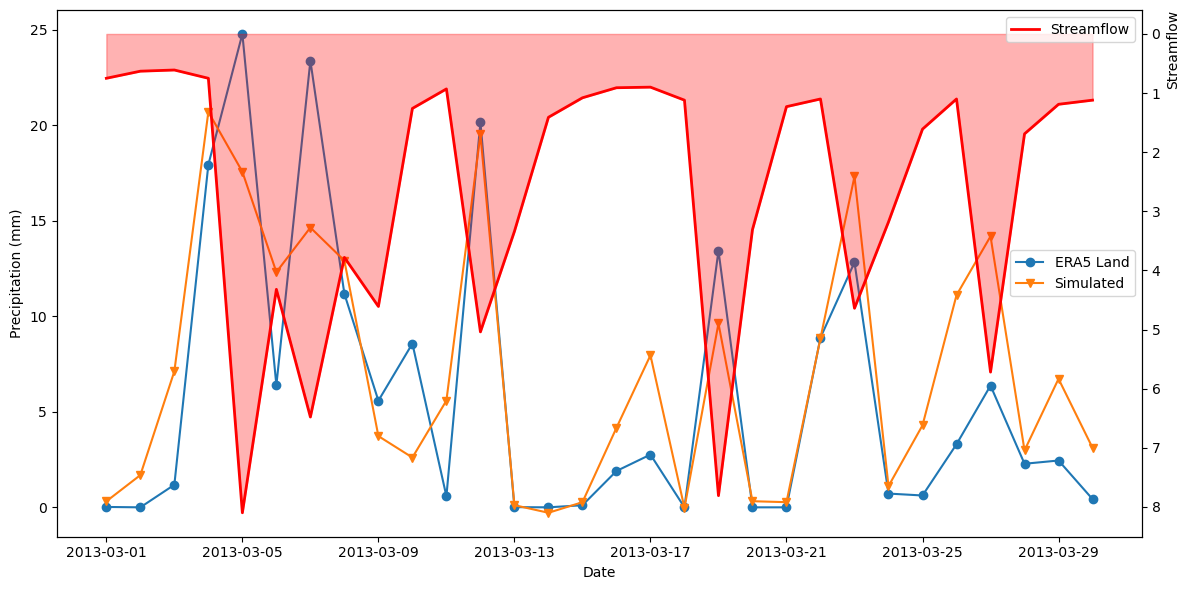

In [76]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    
    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', marker='v')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')
    #ax1.set_ylim([0, 50])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    #ax2.set_ylim([0, 25])
    #ax2.set_yticks([0,2,4,6,8,10])
    ax2.invert_yaxis()

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'camelses_5056'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\camelses\{catchment}.csv"
start_date = '2013-03-01'
end_date = '2013-03-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, csv_path, catchment, start_date, end_date)

In [32]:
y_sim_filtered = y_sim.loc[start_date:end_date, catchment]

In [33]:
y_sim_filtered

Series([], Name: camelses_2062, dtype: float64)